# Case study on Pre-processing


Do the following on titanic dataset.
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

## Importing the libraries needed

In [545]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## 1.Reading the dataset to the python environment

In [546]:
data= pd.read_csv('titanic_dataset.csv')

In [547]:
data.head()
##checking whether the dataset is loaded properly

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The given dataset is loaded properly

## 2. Make ‘PassengerId’ as the index column

In [548]:
data=pd.read_csv('titanic_dataset.csv',index_col = 'PassengerId')

## here we are making Passenger Id column as the index column

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Check the basic details of the dataset

In [549]:
data.shape
##checking the shape of the dataset

(891, 11)

The given dataset consist of 891 rows and 11 columns

In [550]:
data.info()
##to get the basic information of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


It consist of 2 float datatype columns ,4 integer datatype columns and 5 object type datatype column

In [551]:
data.isna().sum()
##Checking for any null values present in the dataset 

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

From the above details we could understand that there are null values present in the "age, cabin, embarked " columns.

In [552]:
data.describe()
##Checking the statistics of columns

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The mean , standard deviation,quartile , inter quartile range etc for different zones is shown above

## 4. Fill in all the missing values present in all the columns in the dataset

we have seen that there are null values in the " Age, cabin, embarked " columns and here we going to fill in those missing values

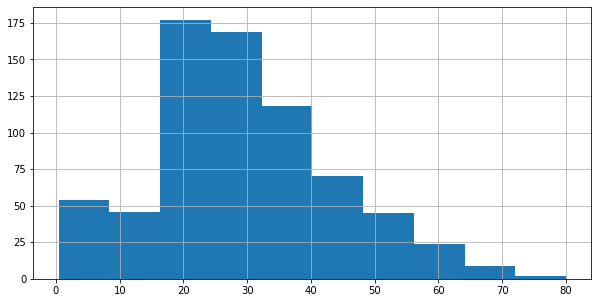

In [553]:
##Here inorder to fill the missing values we need to take the distribution of age data 
freqgraph=data['Age']
freqgraph.hist(figsize=(10,5))
plt.show()

It is clear from the graph that age data shows a normal distribution so we could use the mean of age data to fill in the missing.

In [554]:
## filling with the mean value
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [555]:
##filling the missing values in cabin column as zero
data['Cabin'] = data['Cabin'].fillna(0)

In [556]:
##filling missing values in embarked column
data['Embarked']=data['Embarked'].fillna(data['Embarked'].value_counts().index[0])

##using this null values get excluded

In [557]:
data.isna().sum()
##checking for null values

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

All the null values are filled

## 5. Check and handle outliers in at least 3 columns in the dataset

### Handling outlier in Age column

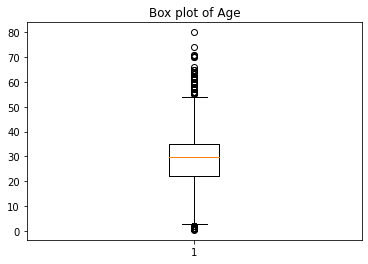

In [558]:
##checking for outliers using boxplot
plt.boxplot(data['Age'])
plt.title('Box plot of Age')
plt.show()

We can see that outliers are present

In [559]:
##To deal with the outliers we are using interquartile range
##here we need to divide the dataset into quartiles Q1,Q2,Q3; using percetile function in numpy

Q1 = np.percentile(data['Age'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['Age'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['Age'],75,interpolation = 'midpoint')

In [560]:
print('Q1:',Q1)
print('Q2:',Q2)
print('Q3:',Q3)

Q1: 22.0
Q2: 29.69911764705882
Q3: 35.0


In [561]:
IQR = Q3 - Q1
low_lim = Q1-1.5*IQR
up_lim = Q3 + 1.5*IQR
print('IQR is :',IQR)
print('Lower limit value is:',low_lim)
print('Upper limit value is:',up_lim)

IQR is : 13.0
Lower limit value is: 2.5
Upper limit value is: 54.5


The values less than 2.5 and greater than 54.5 are outliers and can be removed

In [562]:
##removing outliers
outlier = []
for x in data['Age']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [563]:
print('Outliers :',outlier)

Outliers : [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [564]:
##finding index of outliers
ind1 = data['Age'] > up_lim
data.loc[ind1].index ##here all values greater than upper limit are taken to index1 and locating their index valuesfrom the data

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [565]:
##dropping the above index values
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace = True)

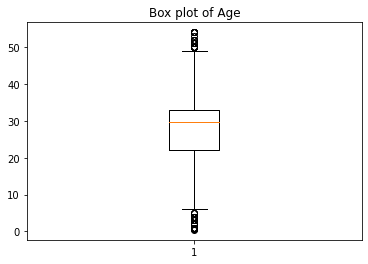

In [566]:
##plotting a box plot to check if the outliers are dropped
plt.boxplot(data['Age'])
plt.title('Box plot of Age')
plt.show()

The outliers are dropped.

### Handling outlier in Sibsp column

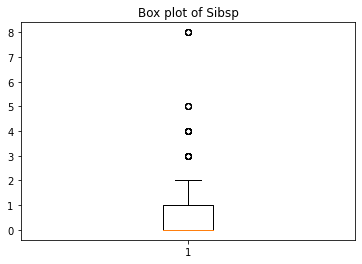

In [567]:
##checking for outliers using boxplot
plt.boxplot(data['SibSp'])
plt.title('Box plot of Sibsp')
plt.show()

Outliers are present

In [568]:
##To deal with the outliers we are using interquartile range
##here we need to divide the dataset into quartiles Q1,Q2,Q3; using percetile function in numpy

Q1 = np.percentile(data['SibSp'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['SibSp'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['SibSp'],75,interpolation = 'midpoint')

In [569]:
print('Q1:',Q1)
print('Q2:',Q2)
print('Q3:',Q3)

Q1: 0.0
Q2: 0.0
Q3: 1.0


In [570]:
IQR = Q3 - Q1
low_lim = Q1-1.5*IQR
up_lim = Q3 + 1.5*IQR
print('IQR is :',IQR)
print('Lower limit value is:',low_lim)
print('Upper limit value is:',up_lim)

IQR is : 1.0
Lower limit value is: -1.5
Upper limit value is: 2.5


The values less than -1.5 and greater than 2.5 are outliers and can be removed

In [571]:
##removing outliers
outlier = []
for x in data['SibSp']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [572]:
print('Outliers :',outlier)

Outliers : [3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [573]:
##finding index of outliers
ind1 = data['SibSp'] > up_lim
data.loc[ind1].index ##here all values greater than upper limit are taken to index1 and locating their index valuesfrom the data

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [574]:
##Dropping the above index values
data.drop([8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],inplace = True)

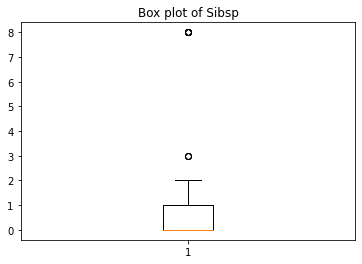

In [575]:
##plotting a box plot to check if the outliers are dropped
plt.boxplot(data['SibSp'])
plt.title('Box plot of Sibsp')
plt.show()

The outliers are dropped.

### Handling outlier in fare column

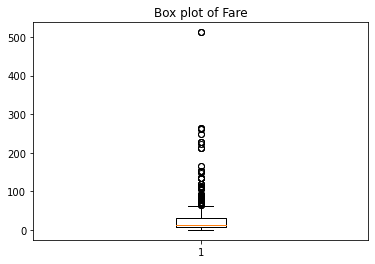

In [576]:
##checking for outliers using boxplot
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')
plt.show()

outliers are present

In [577]:
##To deal with the outliers we are using interquartile range
##here we need to divide the dataset into quartiles Q1,Q2,Q3; using percetile function in numpy

Q1 = np.percentile(data['Fare'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['Fare'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['Fare'],75,interpolation = 'midpoint')

In [578]:
print('Q1:',Q1)
print('Q2:',Q2)
print('Q3:',Q3)

Q1: 7.8958
Q2: 13.0
Q3: 29.7


In [579]:
IQR = Q3 - Q1
low_lim = Q1-1.5*IQR
up_lim = Q3 + 1.5*IQR
print('IQR is :',IQR)
print('Lower limit value is:',low_lim)
print('Upper limit value is:',up_lim)

IQR is : 21.804199999999998
Lower limit value is: -24.810499999999998
Upper limit value is: 62.4063


The values less than -24.81 and greater than 62.4063 are outliers and can be removed

In [580]:
##removing outliers
outlier = []
for x in data['Fare']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [581]:
print('Outliers :',outlier)

Outliers : [71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 63.3583, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 135.6333, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 78.2667, 153.4625, 65.0, 77.9583, 69.3, 76.7292, 73.5, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 65.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 83.1583, 69.55, 89.1042, 164.8667, 69.55]


In [582]:
##finding index of outliers
ind1 = data['Fare'] > up_lim
z=data.loc[ind1].index ##here all values greater than upper limit are taken to index1 and locating their index valuesfrom the data
z

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=109)

In [583]:
##Dropping the above index values
data.drop(z,inplace = True)

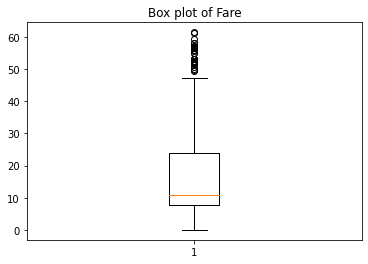

In [584]:
##checking if outliers are dropped using boxplot
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')
plt.show()

Outliers are dropped

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [585]:
x=data.drop(['Survived','Name','Sex','Ticket','Cabin','Embarked'],axis=1)


In [587]:
from sklearn import preprocessing
mmax= preprocessing.MinMaxScaler(feature_range=(0,1))
x=mmax.fit_transform(x)

x=pd.DataFrame(x)
x.columns=['Pclass','Age','SibSp','Parch','Fare']
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,704.000000,704.000000,704.000000,704.000000,704.000000
mean,0.747159,0.524175,0.142045,0.048532,0.272302
std,0.359774,0.191650,0.256621,0.127173,0.212295
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.402762,0.000000,0.000000,0.128369
50%,1.000000,0.546456,0.000000,0.000000,0.176363
75%,1.000000,0.608063,0.500000,0.000000,0.391012
max,1.000000,1.000000,1.000000,1.000000,1.000000
